# Bibliotecas

In [28]:
import pandas as pd
import numpy as np
from datetime import date, datetime
import tweepy
import json
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
from os import path
import os
import pytz
import requests

# Funções

In [29]:
def dias_semana(series, dicionario):
    lista = []
    for i in series.dt.day_name():
        for chave, valor in dicionario.items():
            if i == chave:
                lista.append(valor)
    return lista

In [30]:
def pega_coluna(json, chave):
        lista = []
        for i in json:
                lista.append(i[chave])
        return lista

In [31]:
def pega_coluna_2chave(json, chave1, chave2):
    lista = []
    for i in json[chave1]:
        lista.append(i[chave2])
    return lista

In [32]:
def pega_coluna_3chave(json, chave1, chave2, chave3):
    lista = []
    for i in json[chave1]:
        for k in i[chave2]:
            lista.append(k[chave3])
    return lista

In [33]:
def pega_coluna3chave_brawl(json, chave1, chave2, chave3):
    lista = []
    for i in json[chave1]:
        try:
            lista.append(i[chave2][chave3])
        except:
            lista.append(None)
    return lista

In [34]:
def pega_coluna4chave_brawl(json, chave1, chave2, chave3, chave4):
    lista = []
    for i in json[chave1]:
        try:
            lista.append(i[chave2][chave3][chave4])
        except:
            lista.append(None)
    return lista

# APP Usage

## App Usage

In [35]:
usage = pd.read_csv(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\AUM_V4_Usage_2021-08-05_10-23-17.csv')

In [36]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App name      846 non-null    object 
 1   Usage time    844 non-null    object 
 2   Access count  270 non-null    float64
dtypes: float64(1), object(2)
memory usage: 20.0+ KB


In [37]:
usage['App name'].describe()

count                846
unique               840
top       Pomodoro Timer
freq                   2
Name: App name, dtype: object

### Limpeza de dados

#### Tirando dados errados

Dados que vieram apenas a data e não separado por app

In [38]:
#Vieram alguns dados apenas com a data, mas sem o nome do app
filtro = usage['App name'].str.contains('/2', na=False)

In [39]:
usage.drop(usage[filtro].index, inplace=True)
usage.tail()

,App name,Usage time,Access count
270,NaN,NaN,NaN
271,Date,Usage time,NaN
845,NaN,NaN,NaN
846,"Histórico de uso, 5 de agosto de 2021 - 1 de j...",NaN,NaN
847,"Created by App Usage on quinta-feira, 5 de ago...",NaN,NaN


#### Apagando NaN

In [40]:
#Vieram alguns daddos faltando
usage.dropna(inplace=True)

In [41]:
usage.shape

(270, 3)

#### Renomeando colunas

In [42]:
usage.columns = ['Aplicativo', 'Tempo de uso', 'Número de acessos']

#### Separando a coluna de tempo em horas, minutos e segundos

In [43]:
usage[['hora', 'minuto', 'segundo']] = usage['Tempo de uso'].str.split(':').apply(pd.Series)
usage.head()

,Aplicativo,Tempo de uso,Número de acessos,hora,minuto,segundo
0,Twitter,618:50:15,12664.0,618,50,15
1,Instagram,549:45:15,15041.0,549,45,15
2,Brawl Stars,474:29:44,1670.0,474,29,44
3,Forest,464:14:06,6095.0,464,14,06
4,ZenUI Launcher,313:26:53,68386.0,313,26,53


In [44]:
usage[['hora', 'minuto', 'segundo']] = usage[['hora', 'minuto', 'segundo']].astype(int)

### Exportando csv tratado

In [45]:
usage.to_csv(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\App usage\app_usage.csv')

## App Activity

In [46]:
activity = pd.read_csv(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\AUM_V4_Activity_2021-08-05_10-42-40.csv')
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308593 entries, 0 to 308592
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   App name  308592 non-null  object
 1   Date      308590 non-null  object
 2   Time      308590 non-null  object
 3   Duration  308590 non-null  object
dtypes: object(4)
memory usage: 9.4+ MB


In [47]:
#abrindo csv já tratado.
activity = pd.read_csv(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\App usage\app_activity.csv')
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308590 entries, 0 to 308589
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Aplicativo        308590 non-null  object 
 1   Data              308590 non-null  object 
 2   Horário           308590 non-null  object 
 3   Duração           308590 non-null  object 
 4   hora              308590 non-null  float64
 5   minuto            308590 non-null  float64
 6   segundo           308590 non-null  float64
 7   Duração em horas  308590 non-null  float64
 8   dias da semana    308590 non-null  object 
dtypes: float64(4), object(5)
memory usage: 21.2+ MB


### Limpeza dos dados

#### Renomeando colunas

In [ ]:
activity.columns = ['Aplicativo', 'Data', 'Horário', 'Duração']

#### Excluindo NaN

In [ ]:
activity[activity.isna().values.any()]

In [ ]:
activity[activity['Data'].isna()]


In [ ]:
activity.dropna(inplace=True)
activity.tail()

#### Transformando colunas de data e horário

In [ ]:
activity.info()

In [ ]:
activity['Data'] = pd.to_datetime(activity['Data'])
activity.info()

In [ ]:
activity[['hora', 'minuto', 'segundo']] = activity['Duração'].str.split(':').apply(pd.Series)
activity.head()

In [ ]:
activity[['hora', 'minuto', 'segundo']] = activity[['hora', 'minuto', 'segundo']].astype(float)

### Convertendo todas as colunas para uma só com horas como unidade de medida

In [ ]:
activity['Duração em horas'] =  activity['hora']+(activity['minuto']/60)+(activity['segundo']/3600)
activity.head()

In [ ]:
activity[['Aplicativo', 'Duração em horas']].groupby(['Aplicativo']).sum().sort_values(by='Duração em horas', ascending=False)

### Criando colunas de dias da semana

In [52]:
dias = {
    'Monday': 'Segunda',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday':'Sábado',
    'Sunday': 'Domingo' 
}

In [ ]:
activity['dias da semana'] = dias_semana(activity['Data'], dias)
activity.head()

### Análise exploratória

In [ ]:
activity[['dias da semana', 'Duração em horas']].groupby('dias da semana').mean()

In [ ]:
activity[['dias da semana', 'Duração em horas']].groupby('dias da semana').sum().reset_index()

In [ ]:
activity['dias da semana'].value_counts()

In [ ]:
print(activity['Data'].min(), activity['Data'].max())

In [ ]:
domingos = activity['dias da semana'] == 'Domingo'
activity[domingos]

In [ ]:
#Alguns meses estão faltando alguns dias. O app não capturou nada nesses dias
len(activity[domingos].groupby(['Data']).agg({"Data": 'nunique'}))

In [ ]:
(activity[['Data']].groupby([activity['Data'].dt.year, activity['Data'].dt.month])
  .nunique()
  .rename_axis(['year', 'month'])
  .reset_index())

,year,month,Data
0,2020,1,30
1,2020,2,23
2,2020,3,31
3,2020,4,30
4,2020,5,31
5,2020,6,30
6,2020,7,31
7,2020,8,31
8,2020,9,30
9,2020,10,31


In [ ]:
activity[['Aplicativo', 'Duração em horas']].groupby('Aplicativo').sum().sort_values(by='Duração em horas', ascending=False).head(15)

,Duração em horas
Aplicativo,
Tela desligada (bloqueada),9509.740833
Twitter,624.665000
Instagram,536.823611
Brawl Stars,471.649444
Forest,442.930000
ZenUI Launcher,323.698889
Dispositivo desligado,320.719444
WhatsApp,238.191944
Spotify,185.626389


In [ ]:
activity.to_csv(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\App usage\app_activity.csv', index=False)

## Categorias

In [ ]:
df = pd.read_csv(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\App usage\AUM_V4_Category_2021-08-11_20-00-10.csv', encoding='utf-8-sig')

In [ ]:
df.columns

Index(['version=1'], dtype='object')

In [ ]:
# usage[['hora', 'minuto', 'segundo']] = 
categorias = df['version=1'].str.split('\t').apply(pd.Series)
pd.DataFrame(categorias)

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,Sys category id,"""Name""",NaN,NaN
2,-1,"""Outros""",NaN,NaN
3,0,"""Jogos""",NaN,NaN
4,1,"""Música e áudio""",NaN,NaN
...,...,...,...,...
350,San Luti Pizzaria,"""com.wabiz.delivery.sanluti""","""Outros""","""0"""
351,Bullet Echo,"""com.zeptolab.bulletecho.google""","""Jogos""","""0"""
352,Brasil nos Jogos de Tóquio,"""com.romapp.brasil_em_toquio""","""Outros""","""0"""
353,NaN,NaN,NaN,NaN


In [ ]:
lista = []
for i in categorias[0]:
    for k in activity['Aplicativo']:
        if i == k:
            for z in categorias[1]:
                lista.append(z)

lista[0:5]

[nan, '"Name"', '"Outros"', '"Jogos"', '"Música e áudio"']

In [ ]:
activity.loc[activity['Aplicativo'] == categorias['Aplicativo'], ]

In [ ]:
categorias = categorias.rename(columns={0: 'Aplicativo', 1:'Categoria', 2:'nan', 3:'nen'})

In [ ]:
dicionario = dict(zip(categorias['Aplicativo'], categorias['nan']))
dicionario

In [ ]:
lista = []
for i in activity['Aplicativo']:
    if i in dicionario.items():
        lista.append(dicionario.values())

lista[0:5]

[]

In [ ]:
print(len(lista), len(activity['Aplicativo']))

108623680 308590


# Brawl Stars

## Players

In [ ]:
openfile = open(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\Brawl Stars\players.json', encoding='UTF-8')
players_json = json.load(openfile)
players = pd.json_normalize(players_json)
players.head()

,tag,name,nameColor,trophies,highestTrophies,highestPowerPlayPoints,expLevel,expPoints,isQualifiedFromChampionshipChallenge,3vs3Victories,soloVictories,duoVictories,bestRoboRumbleTime,bestTimeAsBigBrawler,brawlers,icon.id,club.tag,club.name
0,#2OCCV8LO,felisouza,0xffcb5aff,21716,21777,612,154,123338,False,7047,235,305,5,0,"[{'id': 16000000, 'name': 'SHELLY', 'power': 1...",28000005,#GJ2J0L,googans bih


In [ ]:
players_json[0]['brawlers']

[{'id': 16000000,
  'name': 'SHELLY',
  'power': 10,
  'rank': 22,
  'trophies': 524,
  'highestTrophies': 601,
  'starPowers': [{'id': 23000076, 'name': 'SHELL SHOCK'},
   {'id': 23000135, 'name': 'BAND-AID'}],
  'gadgets': [{'id': 23000288, 'name': 'CLAY PIGEONS'},
   {'id': 23000255, 'name': 'FAST FORWARD'}]},
 {'id': 16000001,
  'name': 'COLT',
  'power': 10,
  'rank': 21,
  'trophies': 495,
  'highestTrophies': 581,
  'starPowers': [{'id': 23000138, 'name': 'MAGNUM SPECIAL'}],
  'gadgets': [{'id': 23000273, 'name': 'SPEEDLOADER'},
   {'id': 23000319, 'name': 'SILVER BULLET'}]},
 {'id': 16000002,
  'name': 'BULL',
  'power': 10,
  'rank': 21,
  'trophies': 500,
  'highestTrophies': 577,
  'starPowers': [{'id': 23000078, 'name': 'BERSERKER'},
   {'id': 23000137, 'name': 'TOUGH GUY'}],
  'gadgets': [{'id': 23000272, 'name': 'T-BONE INJECTOR'},
   {'id': 23000310, 'name': 'STOMPER'}]},
 {'id': 16000003,
  'name': 'BROCK',
  'power': 10,
  'rank': 22,
  'trophies': 567,
  'highestTroph

## Battles

In [ ]:
token = #minha chave criada no site da API

In [ ]:
headers = {"Authorization": "Bearer "+token}

response = requests.get(url, headers=headers) 
battles_json = response.json()


In [ ]:
out_file = open(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\Brawl Stars\your_json_file','w')
json.dump(battle,out_file)


In [ ]:
openfile = open(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\Brawl Stars\your_json_file.json', encoding='utf-8')
battles_json = json.load(openfile)

In [ ]:
openfile = open(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\Brawl Stars\battles.json', encoding='UTF-8')
battles_json = json.load(openfile)

In [ ]:
battles_json['items']

In [ ]:
battles_json['items'][-1]['battle']['result']

'defeat'

In [ ]:
df = {
    'Data' : pega_coluna(battles_json['items'], 'battleTime'),
    'Modo de batalha' : pega_coluna3chave_brawl(battles_json, 'items', 'battle', 'mode'),
    'Resultado': pega_coluna3chave_brawl(battles_json, 'items', 'battle', "result"),
    'Tempo': pega_coluna3chave_brawl(battles_json, 'items', 'battle', 'duration'),
    'Craque da partida' : pega_coluna4chave_brawl(battles_json, 'items', 'battle', "starPlayer", 'name')
}

battles = pd.DataFrame(data=df)

battles.head()

,Data,Modo de batalha,Resultado,Tempo,Craque da partida
0,20210803T210505.000Z,volleyBrawl,victory,39,José Humberto
1,20210803T210406.000Z,volleyBrawl,defeat,150,Teigøl
2,20210803T210040.000Z,volleyBrawl,victory,39,felisouza
3,20210803T205914.000Z,volleyBrawl,victory,71,felisouza
4,20210803T205744.000Z,volleyBrawl,defeat,31,loko on


In [ ]:
battles.shape

(25, 5)

## Transformando a coluna de data

In [ ]:
timezone = pytz.timezone('America/Sao_Paulo')
battles['Data'] = pd.to_datetime(battles['Data']).dt.tz_convert(timezone)
battles.head()



,Data,Modo de batalha,Resultado,Tempo,Craque da partida
0,2021-08-03 18:05:05-03:00,volleyBrawl,victory,39,José Humberto
1,2021-08-03 18:04:06-03:00,volleyBrawl,defeat,150,Teigøl
2,2021-08-03 18:00:40-03:00,volleyBrawl,victory,39,felisouza
3,2021-08-03 17:59:14-03:00,volleyBrawl,victory,71,felisouza
4,2021-08-03 17:57:44-03:00,volleyBrawl,defeat,31,loko on


# Instagram

In [ ]:
openfile = open(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\instagram\liked_posts.json')
likes_json = json.load(openfile)


In [ ]:
##Banco já tratado
instagram = pd.read_csv(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\instagram\likes.csv')
instagram.head()

,Conta,Data,Dias da semana
0,gunesozan,2013-12-02 23:32:02,Segunda
1,gunesozan,2013-12-02 23:31:54,Segunda
2,hajhony,2013-12-02 23:30:47,Segunda
3,andrewknapp,2013-12-02 23:26:57,Segunda
4,thomas_k,2013-12-02 13:32:09,Segunda


### Montando o Data Frame

In [ ]:
df = {
    'Conta': pega_coluna_2chave(likes_json, "likes_media_likes", "title"), 
    'Data': pega_coluna_3chave(likes_json, 'likes_media_likes', 'string_list_data', 'timestamp')
    }
likes = pd.DataFrame(data=df)

likes.head()

,Conta,Data
0,gunesozan,1386027122
1,gunesozan,1386027114
2,hajhony,1386027047
3,andrewknapp,1386026817
4,thomas_k,1385991129


### Montando as colunas de datas

In [ ]:
likes['Data'] = pd.to_datetime(likes['Data'], unit='s')


In [ ]:
likes['Dias da semana'] = dias_semana(likes['Data'], dias)


In [ ]:
likes.head()

,Conta,Data,Dias da semana
0,gunesozan,2013-12-02 23:32:02,Segunda
1,gunesozan,2013-12-02 23:31:54,Segunda
2,hajhony,2013-12-02 23:30:47,Segunda
3,andrewknapp,2013-12-02 23:26:57,Segunda
4,thomas_k,2013-12-02 13:32:09,Segunda


### Exportando dados para CSV

In [ ]:
likes.to_csv(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\instagram\likes.csv', index=False, encoding='UTF-8')

## Pools, Quizzes e Stories

In [49]:
openfile = open(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\instagram\polls.json')
poll_json = json.load(openfile)

In [50]:
df = {
    'Conta': pega_coluna_2chave(poll_json, "story_activities_polls", "title"),
    'Data': pega_coluna_3chave(poll_json, "story_activities_polls", "string_list_data", "timestamp")  
    }

poll = pd.DataFrame(data=df)

poll.head()

,Conta,Data
0,oficialpassaabola,1628118589
1,oficialpassaabola,1628118584
2,oficialpassaabola,1628118567
3,oficialpassaabola,1628118562
4,oficialmanualjr,1628105059


In [53]:
poll['Data'] = pd.to_datetime(poll['Data'], unit='s')
poll['Dias da semana'] = dias_semana(poll['Data'], dias)

poll['Tipo'] = poll['Data'].map(lambda i: 'polls')

poll.head()

,Conta,Data,Dias da semana,Tipo
0,oficialpassaabola,2021-08-04 23:09:49,Quarta-feira,polls
1,oficialpassaabola,2021-08-04 23:09:44,Quarta-feira,polls
2,oficialpassaabola,2021-08-04 23:09:27,Quarta-feira,polls
3,oficialpassaabola,2021-08-04 23:09:22,Quarta-feira,polls
4,oficialmanualjr,2021-08-04 19:24:19,Quarta-feira,polls


In [54]:
openfile = open(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\instagram\quizzes.json', encoding='utf-8')
quizzes = json.load(openfile) 

In [55]:
df = {
    'Conta': pega_coluna_2chave(quizzes, "story_activities_quizzes", "title"),
    'Data': pega_coluna_3chave(quizzes, "story_activities_quizzes", "string_list_data", "timestamp")  
    }
quizzes = pd.DataFrame(data=df)

quizzes['Data'] = pd.to_datetime(quizzes['Data'], unit='s')
quizzes['Dias da semana'] = dias_semana(quizzes['Data'], dias)

quizzes['Tipo'] = quizzes['Data'].map(lambda i: 'quizzes')

quizzes.head()

,Conta,Data,Dias da semana,Tipo
0,natalyneri,2020-10-07 16:52:08,Quarta-feira,quizzes
1,livtraducoes,2020-09-20 19:58:17,Domingo,quizzes
2,livtraducoes,2020-07-10 23:05:54,Sexta-feira,quizzes
3,livtraducoes,2020-07-10 23:05:47,Sexta-feira,quizzes
4,livtraducoes,2020-07-10 23:05:38,Sexta-feira,quizzes


In [56]:
openfile = open(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\instagram\stories.json')
stories_json = json.load(openfile)

In [57]:
stories_json["ig_stories"][0]

{'uri': 'media/stories/201802/27813014_412382209182459_2942690629494483525_n_17851040875233996.mp4',
 'creation_timestamp': 1518647523,
 'title': 'Meu Deus que homi maravilhouso'}

In [58]:
df = {
    'Título': pega_coluna_2chave(stories_json, "ig_stories", "title"),
    'Data': pega_coluna_2chave(stories_json, "ig_stories", "creation_timestamp")  
    }
stories = pd.DataFrame(data=df)

stories['Data'] = pd.to_datetime(stories['Data'], unit='s')
stories['Dias da semana'] = dias_semana(stories['Data'], dias)

stories['Tipo'] = stories['Data'].map(lambda i: 'stories')

stories.head()

,Título,Data,Dias da semana,Tipo
0,Meu Deus que homi maravilhouso,2018-02-14 22:32:03,Quarta-feira,stories
1,I'm a black man in a white world\nI'm a black ...,2018-02-14 22:22:25,Quarta-feira,stories
2,Burguer de soja\nProvolone\nChampignon,2018-02-10 23:42:21,Sábado,stories
3,,2018-02-09 15:26:33,Sexta-feira,stories
4,,2018-02-08 23:43:05,Quinta-feira,stories


In [ ]:
poll.head()

,Conta,Data,Dias da semana,Tipo
0,oficialpassaabola,2021-08-04 23:09:49,Quarta-feira,polls
1,oficialpassaabola,2021-08-04 23:09:44,Quarta-feira,polls
2,oficialpassaabola,2021-08-04 23:09:27,Quarta-feira,polls
3,oficialpassaabola,2021-08-04 23:09:22,Quarta-feira,polls
4,oficialmanualjr,2021-08-04 19:24:19,Quarta-feira,polls


In [ ]:
interacao = pd.concat([poll, quizzes, stories])
interacao.head()

,Conta,Data,Dias da semana,Tipo,Título
0,oficialpassaabola,2021-08-04 23:09:49,Quarta-feira,polls,NaN
1,oficialpassaabola,2021-08-04 23:09:44,Quarta-feira,polls,NaN
2,oficialpassaabola,2021-08-04 23:09:27,Quarta-feira,polls,NaN
3,oficialpassaabola,2021-08-04 23:09:22,Quarta-feira,polls,NaN
4,oficialmanualjr,2021-08-04 19:24:19,Quarta-feira,polls,NaN


In [ ]:
interacao.to_csv(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\instagram\interacao.csv', index=False, encoding='utf-8')

In [ ]:
poll['Data'].min()

Timestamp('2018-02-27 10:32:26')

# Spotify

In [ ]:
#Os dados já estavam tratados do projeto final da turma VamoAI.
spotify = pd.read_csv(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\Spotify\spotify_Felipe.csv')
spotify.head()

,endTime,artistName,trackName,msPlayed,timePlayed,tipo,dias da semana
0,2020-07-19 00:38:00,Rosa Neon,Vai Devagar,218775,0 days 00:03:38.775000,música,Domingo
1,2020-07-19 00:58:00,Rosa Neon,Brilho de Leão,19224,0 days 00:00:19.224000,música,Domingo
2,2020-07-19 02:54:00,Jay Rock,Rotation 112th,212240,0 days 00:03:32.240000,música,Domingo
3,2020-07-19 02:59:00,Childish Gambino,II. Earth: The Oldest Computer (The Last Night),282418,0 days 00:04:42.418000,música,Domingo
4,2020-07-19 03:03:00,Beastie Boys,Paul Revere,220840,0 days 00:03:40.840000,música,Domingo


In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9929 entries, 0 to 9928
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   endTime         9929 non-null   object
 1   artistName      9929 non-null   object
 2   trackName       9929 non-null   object
 3   msPlayed        9929 non-null   int64 
 4   timePlayed      9929 non-null   object
 5   tipo            9929 non-null   object
 6   dias da semana  9929 non-null   object
dtypes: int64(1), object(6)
memory usage: 543.1+ KB


# Youtube

## Inscrições

In [ ]:
#Banco já estava tratado de outro case
inscricoes = pd.read_csv(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\Youtube\inscrições_Felipe.csv')
inscricoes.head()

,Canal,Nome vídeo,Data,Inscrição,Dia da semana,Hora,nova data
0,Python Engineer,Watched YouTube Data API Tutorial with Python ...,2021-07-19 11:47:22.504000-03:00,Não inscrito,Segunda,11,2021-07-19 14:47:22.504000+00:00
1,Programação Dinâmica,Watched Como abrir um dataset MUITO GRANDE no ...,2021-07-19 11:36:36.763000-03:00,Inscrito,Segunda,11,2021-07-19 14:36:36.763000+00:00
2,Programação Dinâmica,Watched VOCÊ SABE EXTRAIR INFORMAÇÕES DE DADOS...,2021-07-19 11:36:16.054000-03:00,Inscrito,Segunda,11,2021-07-19 14:36:16.054000+00:00
3,Programação Dinâmica,Watched MODIFICANDO o tamanho das COLUNAS de u...,2021-07-19 11:34:28.727000-03:00,Inscrito,Segunda,11,2021-07-19 14:34:28.727000+00:00
4,Hashtag Programação,Watched Introdução a Análise de Dados com Pyth...,2021-07-19 10:43:14.945000-03:00,Não inscrito,Segunda,10,2021-07-19 13:43:14.945000+00:00


In [ ]:
inscricoes.shape

(24665, 7)

In [ ]:
lista_canais = inscricoes['Canal']
lista_canais[0]

'Python Engineer'

## Visualizações

In [ ]:
visualizacoes = pd.read_csv(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\Youtube\youtube.csv')
visualizacoes.head()

,Canal,Nome vídeo,Data,Inscrição,Dia da semana,Hora,nova data,Tipo vídeo
0,Python Engineer,Watched YouTube Data API Tutorial with Python ...,2021-07-19 11:47:22.504000-03:00,Não inscrito,Segunda,11,2021-07-19,Tech
1,Programação Dinâmica,Watched Como abrir um dataset MUITO GRANDE no ...,2021-07-19 11:36:36.763000-03:00,Inscrito,Segunda,11,2021-07-19,Tech
2,Programação Dinâmica,Watched VOCÊ SABE EXTRAIR INFORMAÇÕES DE DADOS...,2021-07-19 11:36:16.054000-03:00,Inscrito,Segunda,11,2021-07-19,Tech
3,Programação Dinâmica,Watched MODIFICANDO o tamanho das COLUNAS de u...,2021-07-19 11:34:28.727000-03:00,Inscrito,Segunda,11,2021-07-19,Tech
4,Hashtag Programação,Watched Introdução a Análise de Dados com Pyth...,2021-07-19 10:43:14.945000-03:00,Não inscrito,Segunda,10,2021-07-19,Tech


In [ ]:
visualizacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24665 entries, 0 to 24664
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Canal          24665 non-null  object
 1   Nome vídeo     24665 non-null  object
 2   Data           24665 non-null  object
 3   Inscrição      24665 non-null  object
 4   Dia da semana  24665 non-null  object
 5   Hora           24665 non-null  int64 
 6   nova data      24665 non-null  object
 7   Tipo vídeo     24665 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.5+ MB


In [ ]:
#No outro projeto salvei o csv com index. Agora excluí a coluna
visualizacoes = visualizacoes.drop(columns='Unnamed: 0')

### Arrumando as datas

In [ ]:
visualizacoes['Data'] = pd.to_datetime(visualizacoes['Data'], utc=True)

In [ ]:
timezone = pytz.timezone('America/Sao_Paulo')
visualizacoes['Data'] = pd.to_datetime(visualizacoes['Data']).dt.tz_convert(timezone)
visualizacoes.head()

,Canal,Nome vídeo,Data,Inscrição,Dia da semana,Hora,nova data,Tipo vídeo
0,Python Engineer,Watched YouTube Data API Tutorial with Python ...,2021-07-19 11:47:22.504000-03:00,Não inscrito,Segunda,11,2021-07-19,Tech
1,Programação Dinâmica,Watched Como abrir um dataset MUITO GRANDE no ...,2021-07-19 11:36:36.763000-03:00,Inscrito,Segunda,11,2021-07-19,Tech
2,Programação Dinâmica,Watched VOCÊ SABE EXTRAIR INFORMAÇÕES DE DADOS...,2021-07-19 11:36:16.054000-03:00,Inscrito,Segunda,11,2021-07-19,Tech
3,Programação Dinâmica,Watched MODIFICANDO o tamanho das COLUNAS de u...,2021-07-19 11:34:28.727000-03:00,Inscrito,Segunda,11,2021-07-19,Tech
4,Hashtag Programação,Watched Introdução a Análise de Dados com Pyth...,2021-07-19 10:43:14.945000-03:00,Não inscrito,Segunda,10,2021-07-19,Tech


In [ ]:
#Criei uma nova coluna só com a data para trabalhar com ela no Tableau
df = visualizacoes['nova data'].str.split(' ').apply(pd.Series)

visualizacoes['nova data'] = df[0]

visualizacoes.head()

### Coluna de canais inscrito ou não

In [ ]:
visualizacoes['Inscrição'] = np.where(visualizacoes['Canal'].str.contains('|'.join(lista_canais)),'Inscrito','Não inscrito')
visualizacoes.head(10)

In [ ]:
filtro = visualizacoes['Inscrição'] == 'Inscrito'
visualizacoes[filtro][['Canal', 'Inscrição']].groupby(by='Canal').sum().sort_values(by='Inscrição', ascending=False)

,Inscrição
Canal,
Desimpedidos,816
Porta dos Fundos,596
Pipocando,269
TheOneGames,257
TecMundo,250
...,...
PROMOVER O BEM,1
Paloma Cipriano,1
Canal do Chef,1


### Coluna dos dias da semana

In [ ]:
visualizacoes['Dia da semana'] = dias_semana(visualizacoes['Data'], dias)
visualizacoes.head()

,Canal,Nome vídeo,Data,Inscrição,Dia da semana,Hora,nova data
0,Python Engineer,Watched YouTube Data API Tutorial with Python ...,2021-07-19 11:47:22.504000-03:00,Não inscrito,Segunda,11,2021-07-19 14:47:22.504000+00:00
1,Programação Dinâmica,Watched Como abrir um dataset MUITO GRANDE no ...,2021-07-19 11:36:36.763000-03:00,Inscrito,Segunda,11,2021-07-19 14:36:36.763000+00:00
2,Programação Dinâmica,Watched VOCÊ SABE EXTRAIR INFORMAÇÕES DE DADOS...,2021-07-19 11:36:16.054000-03:00,Inscrito,Segunda,11,2021-07-19 14:36:16.054000+00:00
3,Programação Dinâmica,Watched MODIFICANDO o tamanho das COLUNAS de u...,2021-07-19 11:34:28.727000-03:00,Inscrito,Segunda,11,2021-07-19 14:34:28.727000+00:00
4,Hashtag Programação,Watched Introdução a Análise de Dados com Pyth...,2021-07-19 10:43:14.945000-03:00,Não inscrito,Segunda,10,2021-07-19 13:43:14.945000+00:00


### Classificando vídeos entre tech e outros

In [ ]:
procura = ['Python', 'python', 'Dados', 'dados', 'data', 'Data']
visualizacoes['Tipo vídeo'] = np.where(visualizacoes['Nome vídeo'].str.contains('|'.join(procura)),'Tech','Outros')
visualizacoes.head()

,Canal,Nome vídeo,Data,Inscrição,Dia da semana,Hora,nova data,Tipo vídeo,Tech
0,Python Engineer,Watched YouTube Data API Tutorial with Python ...,2021-07-19 11:47:22.504000-03:00,Não inscrito,Segunda,11,2021-07-19,Tech,NaN
1,Programação Dinâmica,Watched Como abrir um dataset MUITO GRANDE no ...,2021-07-19 11:36:36.763000-03:00,Inscrito,Segunda,11,2021-07-19,Tech,NaN
2,Programação Dinâmica,Watched VOCÊ SABE EXTRAIR INFORMAÇÕES DE DADOS...,2021-07-19 11:36:16.054000-03:00,Inscrito,Segunda,11,2021-07-19,Tech,NaN
3,Programação Dinâmica,Watched MODIFICANDO o tamanho das COLUNAS de u...,2021-07-19 11:34:28.727000-03:00,Inscrito,Segunda,11,2021-07-19,Tech,NaN
4,Hashtag Programação,Watched Introdução a Análise de Dados com Pyth...,2021-07-19 10:43:14.945000-03:00,Não inscrito,Segunda,10,2021-07-19,Tech,NaN


In [ ]:
#Tirando vídeos de Monty Python da coluna
filtro = visualizacoes['Nome vídeo'].str.contains('Monty')
visualizacoes.loc[[10740, 10741, 10992, 10993, 10994, 10996, 10997, 10998, 10999, 11000, 11683], 'Tipo vídeo'] = 'Outros'
visualizacoes[filtro]

,Canal,Nome vídeo,Data,Inscrição,Dia da semana,Hora,nova data,Tipo vídeo,Tech
10740,Gente Estranha,Watched Monty Python - Sketch da Livraria (LEG...,2019-01-21 19:21:40.436000-02:00,Não inscrito,Segunda,19,2019-01-21,Outros,Outros
10741,Gente Estranha,Watched Monty Python - A piada mais engraçada ...,2019-01-21 19:11:43.633000-02:00,Não inscrito,Segunda,19,2019-01-21,Outros,Outros
10992,Gente Estranha,Watched Monty Python - A piada mais engraçada ...,2018-12-13 23:37:55.727000-02:00,Não inscrito,Quinta-feira,23,2018-12-14,Outros,Outros
10993,Gente Estranha,Watched Monty Python - Competição Inglesa de ...,2018-12-13 23:22:04.287000-02:00,Não inscrito,Quinta-feira,23,2018-12-14,Outros,Outros
10994,Gente Estranha,Watched Monty Python - Certas Substâncias (LEG...,2018-12-13 23:19:21.718000-02:00,Não inscrito,Quinta-feira,23,2018-12-14,Outros,Outros
10996,Gente Estranha,"Watched Átila, o Huno - Monty Python (Legendado)",2018-12-13 23:12:44.370000-02:00,Não inscrito,Quinta-feira,23,2018-12-14,Outros,Outros
10997,Dinis Costa,Watched Monty Python O Sentido da Vida MrCre...,2018-12-13 23:11:49.675000-02:00,Não inscrito,Quinta-feira,23,2018-12-14,Outros,Outros
10998,Leandro Silva,Watched Mary Recruitment Office - Monty Python...,2018-12-13 23:10:58.101000-02:00,Não inscrito,Quinta-feira,23,2018-12-14,Outros,Outros
10999,Gente Estranha,Watched Monty Python - Agência de discussão (...,2018-12-13 23:10:15.412000-02:00,Não inscrito,Quinta-feira,23,2018-12-14,Outros,Outros
11000,Gente Estranha,Watched Monty Python - Entrevista de Emprego ...,2018-12-13 23:03:50.900000-02:00,Não inscrito,Quinta-feira,23,2018-12-14,Outros,Outros


## Nuvem de palavras geral

In [ ]:
#Essa lista para stopwords tira os dados de visualização do meu sobrinho
palavras = ['watched', 'watch', 'da', 'das', 'de', 'di' 'do', 'dos', 'du', 'youtube', 'a', 'e' 'i', 'o', 'os', 'u', 'um', 'uma', 'https', 'que', 'v', 'e', 'é', 'como', 'video', 'vídeo', 'para', 'em', 'não', 'por', 'parte', 'removed', 'na', 'no', 'mais', 'se', 'dia', 'fazer', 'ou', 'pokémon', 'pokemon', 'go', 'minecraft', 'criança', 'dinossauro', 'jogo', 'clash royale', 'jurassic', 'roblox', 'sonic', 'seu', 'sua', 'dinossauros', 'crianças', 'seu', 'sua', 'ep', 'quem', 'coisa', 'coisas' 'qual', 'nova', 'top', 'jogo', 'eu', 'tem', 'têm', 'melhor', 'só', 'faz', 'completo', 'part', 'dica', 'deu', 'fim', 'sobre', 'você', 'making', 'x', 'hoje', 'novo', 'aula', 'casa', 'pra', 'amv', 'tudo', 'foi', 'pior', 'muito', 'oficial', 'official', 'chega', 'nos', 'sem', 'faça' ]

In [ ]:
palavras1 = ['watched', 'watch', 'da', 'das', 'de', 'di' 'do', 'dos', 'du', 'youtube', 'a', 'e' 'i', 'o', 'os', 'u', 'um', 'uma', 'https', 'que', 'v', 'e', 'é', 'como', 'video', 'vídeo', 'para', 'em', 'não', 'por', 'parte', 'removed', 'na', 'no', 'mais', 'se', 'dia', 'fazer', 'ou', 'seu', 'sua', 'ep', 'quem', 'coisa', 'coisas' 'qual', 'nova', 'top', 'jogo', 'eu', 'tem', 'têm', 'melhor', 'só', 'faz', 'completo', 'part', 'dica', 'deu', 'fim', 'sobre', 'você', 'making', 'x', 'hoje', 'novo', 'aula', 'casa', 'pra', 'amv', 'tudo', 'foi', 'pior', 'muito', 'oficial', 'official', 'chega', 'nos', 'sem', 'faça' ]

In [ ]:
visualizacoes['Nome vídeo'].str.contains('Making').value_counts()

False    24640
True        25
Name: Nome vídeo, dtype: int64

### Nuvem 2021

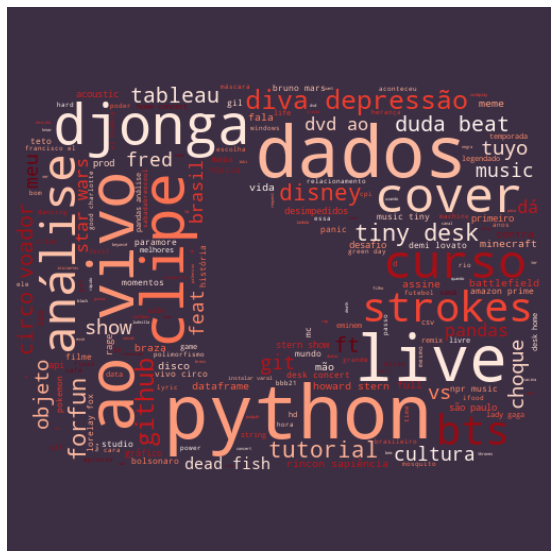

<Figure size 432x288 with 0 Axes>

In [ ]:
filtro = visualizacoes['Data'].dt.year == 2021
text = ' '.join(visualizacoes[filtro]['Nome vídeo'].str.lower())

stopwords = set(STOPWORDS)
stopwords.update(palavras1)

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask = np.array(Image.open(path.join(d, "youtube logo_icon.png")))
wordcloud2 = WordCloud(stopwords=stopwords, background_color='#3c2f44', colormap='Reds', mask=mask).generate(text)
plt.figure(figsize=(15,10))

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig(fname= 'grafico', transparent=True)

### Nuvem de inscritos antes de 2021

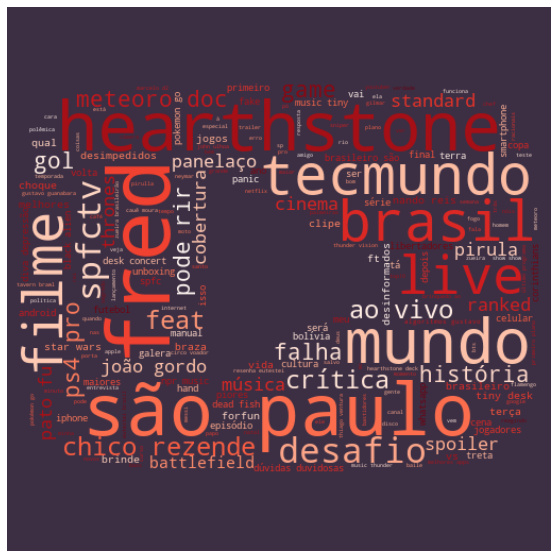

<Figure size 432x288 with 0 Axes>

In [ ]:
filtro = (visualizacoes['Inscrição'] == 'Inscrito') & (visualizacoes['Data'].dt.year != 2021)
text = ' '.join(visualizacoes[filtro]['Nome vídeo'].str.lower())

stopwords = set(STOPWORDS)
stopwords.update(palavras1)

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask = np.array(Image.open(path.join(d, "youtube logo_icon.png")))
wordcloud2 = WordCloud(stopwords=stopwords, background_color='#3c2f44', colormap='Reds', mask=mask).generate(text)
plt.figure(figsize=(15,10))

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig(fname= 'grafico', transparent=True)

### Nuvem não inscrito antes de 2021

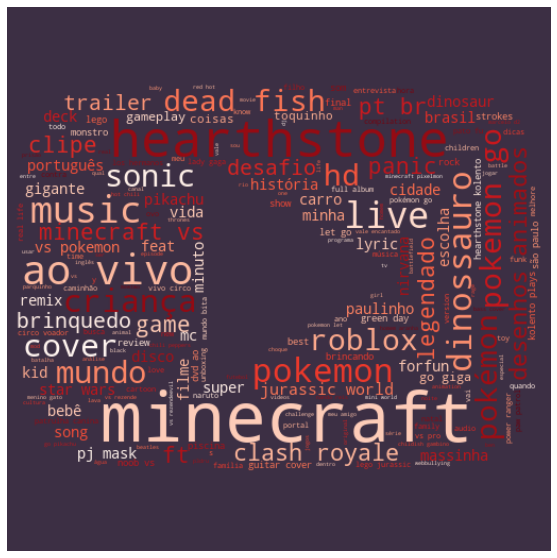

<Figure size 432x288 with 0 Axes>

In [ ]:
filtro = (visualizacoes['Inscrição'] == 'Não inscrito') & (visualizacoes['Data'].dt.year != 2021)
text = ' '.join(visualizacoes[filtro]['Nome vídeo'].str.lower())

stopwords = set(STOPWORDS)
stopwords.update(palavras1)

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask = np.array(Image.open(path.join(d, "youtube logo_icon.png")))
wordcloud2 = WordCloud(stopwords=stopwords, background_color='#3c2f44', colormap='Reds', mask=mask).generate(text)
plt.figure(figsize=(15,10))

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig(fname= 'grafico', transparent=True)

### Nuvem antes de 2021

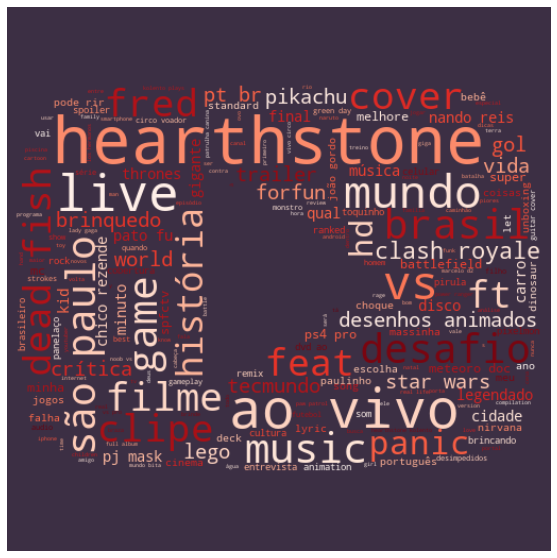

<Figure size 432x288 with 0 Axes>

In [ ]:
filtro = (visualizacoes['Data'].dt.year != 2021)
text = ' '.join(visualizacoes[filtro]['Nome vídeo'].str.lower())

stopwords = set(STOPWORDS)
stopwords.update(palavras)

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask = np.array(Image.open(path.join(d, "youtube logo_icon.png")))
wordcloud2 = WordCloud(stopwords=stopwords, background_color='#3c2f44', colormap='Reds', mask=mask).generate(text)
plt.figure(figsize=(15,10))

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig(fname= 'grafico', transparent=True)

## Horários que vejo vídeo

In [ ]:
visualizacoes['nova data'] =  pega_coluna(visualizacoes_json, 'time')

In [ ]:
visualizacoes['Data'].dt.strftime("%H")

0        14
1        14
2        14
3        14
4        13
         ..
24660    21
24661    21
24662    21
24663    01
24664    01
Name: Data, Length: 24665, dtype: object

### Criando coluna de horas para trabalhar no Tableau

In [ ]:
visualizacoes['Hora'] = visualizacoes['Data'].dt.strftime("%H")
visualizacoes.head()

,Canal,Nome vídeo,Data,Inscrição,Dia da semana,Hora,nova data
0,Python Engineer,Watched YouTube Data API Tutorial with Python ...,2021-07-19 11:47:22.504000-03:00,Não inscrito,Segunda,11,2021-07-19 14:47:22.504000+00:00
1,Programação Dinâmica,Watched Como abrir um dataset MUITO GRANDE no ...,2021-07-19 11:36:36.763000-03:00,Inscrito,Segunda,11,2021-07-19 14:36:36.763000+00:00
2,Programação Dinâmica,Watched VOCÊ SABE EXTRAIR INFORMAÇÕES DE DADOS...,2021-07-19 11:36:16.054000-03:00,Inscrito,Segunda,11,2021-07-19 14:36:16.054000+00:00
3,Programação Dinâmica,Watched MODIFICANDO o tamanho das COLUNAS de u...,2021-07-19 11:34:28.727000-03:00,Inscrito,Segunda,11,2021-07-19 14:34:28.727000+00:00
4,Hashtag Programação,Watched Introdução a Análise de Dados com Pyth...,2021-07-19 10:43:14.945000-03:00,Não inscrito,Segunda,10,2021-07-19 13:43:14.945000+00:00


In [ ]:
visualizacoes['Hora'].value_counts().sort_values(ascending=False)

22    2160
21    2029
23    1834
20    1824
19    1720
14    1693
00    1587
15    1532
16    1440
13    1301
12    1286
17    1256
18    1236
01    1045
11     928
02     682
10     429
03     272
09     165
08      83
04      63
07      52
06      31
05      17
Name: Hora, dtype: int64

In [ ]:
visualizacoes[visualizacoes['Hora']=='00']

,Canal,Nome vídeo,Data,Inscrição,Dia da semana,Hora
7,MrHG94,Watched The Strokes - Under Cover of Darkness ...,2021-07-19 00:16:01.355,Não inscrito,Segunda,00
8,thestrokesVEVO,Watched The Strokes - You Only Live Once (Offi...,2021-07-19 00:12:14.994,Não inscrito,Segunda,00
9,Forfun,Watched Forfun - Aí Sim (Clipe Oficial),2021-07-19 00:11:18.828,Inscrito,Segunda,00
10,Deck,Watched Forfun - Sigo O Som,2021-07-19 00:03:49.360,Não inscrito,Segunda,00
104,Meteoro Brasil,Watched LUIZ DOMINGUETTI NA CPI: UM RESUMO,2021-07-04 00:43:48.419,Inscrito,Domingo,00
...,...,...,...,...,...,...
24527,adsense,Watched https://www.youtube.com/watch?v=FA0-4F...,2015-03-04 00:16:47.019,Não inscrito,Quarta-feira,00
24528,reVisão,Watched Queda da URSS | GUERRA FRIA,2015-03-04 00:04:39.882,Não inscrito,Quarta-feira,00
24556,AndreRieuVEVO,Watched André Rieu - And The Waltz Goes On,2015-03-02 00:03:37.655,Não inscrito,Segunda,00
24593,Cadê a chave?,Watched FOME E FAMA!- Ep. 384,2015-02-27 00:05:29.146,Inscrito,Sexta-feira,00


In [ ]:
visualizacoes['Data'].min()

Timestamp('2015-02-20 23:13:26.132000-0200', tz='America/Sao_Paulo')

In [ ]:
visualizacoes['Data'].max()

Timestamp('2021-07-19 11:47:22.504000-0300', tz='America/Sao_Paulo')

In [ ]:
visualizacoes.to_csv(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\Youtube\youtube.csv', index=False, encoding='utf-8')

# Ifood

## Pedidos

In [ ]:
pedidos = pd.read_csv(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\Ifood\pedidos..csv')
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_usuario     34 non-null     object 
 1   id_pedido      34 non-null     int64  
 2   restaurante    34 non-null     object 
 3   valor          34 non-null     float64
 4   status         34 non-null     object 
 5   data_registro  34 non-null     object 
 6   data_pedido    34 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.0+ KB


In [ ]:
pedidos.head(34)

,id_usuario,id_pedido,restaurante,valor,status,data_registro,data_pedido
0,bf2db368-72b4-42b4-8151-125d4381a53e,2901682456,Burger King - Drive Anhaia Melo,41.69,CONCLUDED,2018-09-15,2021-02-20
1,bf2db368-72b4-42b4-8151-125d4381a53e,4092352676,Al Cachicken - Frango Frito24 - Pacaembu,54.90,CONCLUDED,2018-09-15,2021-07-09
2,bf2db368-72b4-42b4-8151-125d4381a53e,4073011921,Poppins Burger - O Ultrasmash,60.86,CONCLUDED,2018-09-15,2021-07-02
3,bf2db368-72b4-42b4-8151-125d4381a53e,3054614132,Boteco Do Gois,53.49,CONCLUDED,2018-09-15,2021-04-03
4,bf2db368-72b4-42b4-8151-125d4381a53e,2904644674,Forno Mineiro,27.98,CONCLUDED,2018-09-15,2021-02-21
5,bf2db368-72b4-42b4-8151-125d4381a53e,3108158623,Temakeria E Cia - Higienopolis,177.89,CONCLUDED,2018-09-15,2021-04-19
6,bf2db368-72b4-42b4-8151-125d4381a53e,1048074899,Os Muzzarela,23.80,CONCLUDED,2018-09-15,2019-10-14
7,bf2db368-72b4-42b4-8151-125d4381a53e,3255930003,Sushi Hero,45.90,CONCLUDED,2018-09-15,2021-06-05
8,bf2db368-72b4-42b4-8151-125d4381a53e,3253439795,Come On Burger Express,54.49,CONCLUDED,2018-09-15,2021-06-05
9,bf2db368-72b4-42b4-8151-125d4381a53e,4186925830,Poppins Burger - O Ultrasmash,69.75,CONCLUDED,2018-09-15,2021-08-07


In [ ]:
pedidos['data_pedido'] = pd.to_datetime(pedidos['data_pedido'])
pedidos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_usuario     34 non-null     object        
 1   id_pedido      34 non-null     int64         
 2   restaurante    34 non-null     object        
 3   valor          34 non-null     float64       
 4   status         34 non-null     object        
 5   data_registro  34 non-null     object        
 6   data_pedido    34 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [ ]:
pedidos = pedidos.drop(columns=['id_usuario', 'status', 'data_registro'])

In [ ]:
pedidos.to_csv(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\Ifood\pedidos.csv', index=False, encoding='utf-8')

## Endereços

In [ ]:
enderecos = pd.read_csv(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\Ifood\enderecos..csv')
enderecos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_usuario     9 non-null      object
 1   tipo           1 non-null      object
 2   logradouro     9 non-null      object
 3   numero         9 non-null      int64 
 4   complemento    7 non-null      object
 5   bairro         9 non-null      object
 6   cidade         9 non-null      object
 7   estado         9 non-null      object
 8   pais           9 non-null      object
 9   data_registro  9 non-null      object
dtypes: int64(1), object(9)
memory usage: 848.0+ bytes


In [ ]:
enderecos.head(9)

,id_usuario,tipo,logradouro,numero,complemento,bairro,cidade,estado,pais,data_registro
0,bf2db368-72b4-42b4-8151-125d4381a53e,NaN,ESTR DO CORREDOR,1320,"43, BLOCO F",PARQUE PANAMERICANO,SAO PAULO,SP,BR,2018-09-23
1,bf2db368-72b4-42b4-8151-125d4381a53e,NaN,R JOAO FLORENCIO PEREIRA,219,NaN,JARAGUA,SAO PAULO,SP,BR,2018-09-15
2,bf2db368-72b4-42b4-8151-125d4381a53e,NaN,R. OSCÁR THOMPSON,23,505,SANTA CECILIA,SÃO PAULO,SP,BR,2021-08-08
3,bf2db368-72b4-42b4-8151-125d4381a53e,NaN,R. OSCÁR THOMPSON,23,505,SANTA CECILIA,SÃO PAULO,SP,BR,2021-01-26
4,bf2db368-72b4-42b4-8151-125d4381a53e,Casa,R. PIRASSUNUNGA,737,NaN,VILA BERTIOGA,SÃO PAULO,SP,BR,2020-10-03
5,bf2db368-72b4-42b4-8151-125d4381a53e,NaN,ESTR. DO CORREDOR,1320,43F,PARQUE PAN AMERICANO,SÃO PAULO,SP,BR,2020-11-28
6,bf2db368-72b4-42b4-8151-125d4381a53e,NaN,AV. IPIRANGA,200,1308 BLOCO B,CENTRO HISTÓRICO DE SÃO PAULO,SÃO PAULO,SP,BR,2019-10-14
7,bf2db368-72b4-42b4-8151-125d4381a53e,NaN,R. PIRASSUNUNGA,737,CASA DOS FUNDOS,VILA BERTIOGA,SÃO PAULO,SP,BR,2021-01-29
8,bf2db368-72b4-42b4-8151-125d4381a53e,NaN,R. DOM JOSÉ DE BARROS,28,QUARTO 118,REPÚBLICA,SÃO PAULO,SP,BR,2019-06-02


# Forest

In [ ]:
#O app Forest fornece as estatísticas no app, mas não os dados para download, por isso passei os dados do app na mão.
programing = {
    'Janeiro':17.85,
    'Fevereiro':2.5,
    'Março':1,
    'Abril':8.81,
    'Maio':6.61,
    'Junho':0,
    'Julho':8.11,
}

VamoAI = {
    'Janeiro':5.73,
    'Fevereiro':56.88,
    'Março':102.66,
    'Abril':75.5,
    'Maio':74.18,
    'Junho':73.66,
    'Julho':56,
}

Alura = {
    'Janeiro':0,
    'Fevereiro':0,
    'Março':0,
    'Abril':5,
    'Maio':3.5,
    'Junho':0.5,
    'Julho':0,
}

In [ ]:
forest = pd.DataFrame({'Programação':pd.Series(programing),'VamoAI':pd.Series(VamoAI), 'Alura': pd.Series(Alura)}).reset_index()
forest = forest.rename(columns={'index':'Meses'})
forest

,Meses,Programação,VamoAI,Alura
0,Janeiro,17.85,5.73,0.0
1,Fevereiro,2.50,56.88,0.0
2,Março,1.00,102.66,0.0
3,Abril,8.81,75.50,5.0
4,Maio,6.61,74.18,3.5
5,Junho,0.00,73.66,0.5
6,Julho,8.11,56.00,0.0


In [ ]:
forest.to_csv(r'C:\Users\feh_s\Google Drive\7_Resilia\Entrevista\case_ifood\App usage\forest.csv', index=False, encoding='utf-8')